In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Input Dataset

In [5]:
with h5py.File("ecg_tracings.hdf5", "r") as f:
    x = np.array(f['tracings'])
print("Test dataset dimension:", x.shape)

Test dataset dimension: (827, 4096, 12)


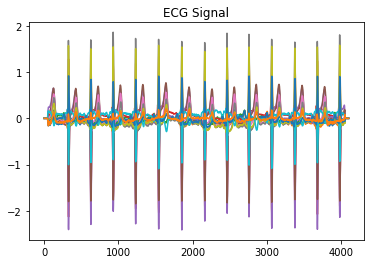

In [6]:
plt.title('ECG Signal')
plt.plot(x[10])
plt.show()

In [7]:
# Output Generated

In [8]:
y = np.load('dnn_output.npy')
print("Output dataset dimension for test data:", y.shape)

Output dataset dimension for test data: (827, 6)


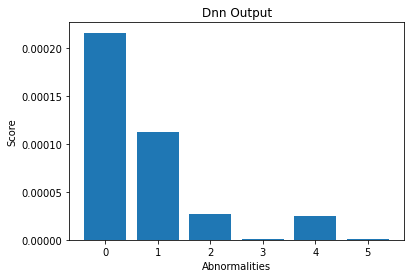

In [9]:
plt.title('Dnn Output')
plt.xlabel('Abnormalities')
plt.ylabel('Score')
plt.bar(np.arange(len(y[10])), y[10])
plt.show()